# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [08:34, 331KB/s]                                                                                           


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 4:
Image - Min Value: 10 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


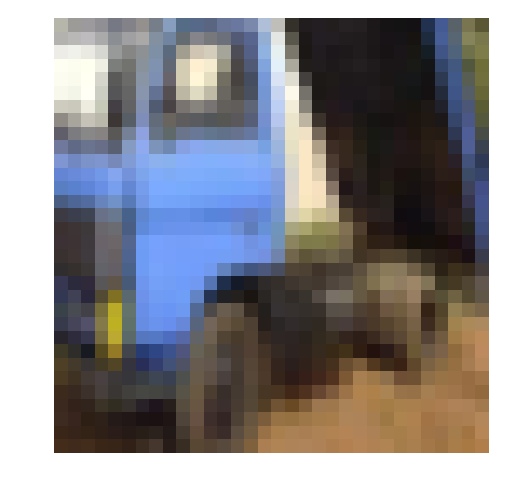

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 4
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [28]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return (x - x.min()) / (x.max() - x.min())


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [40]:
from sklearn.preprocessing import LabelBinarizer

one_hot_encodings = []
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    encoder = LabelBinarizer()
    encoder.fit(np.array([0,1,2,3,4,5,6,7,8,9]))
    one_hot = encoder.transform(x)
    one_hot_encodings.append(one_hot)
    return one_hot

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
#     print(image_shape)
    return tf.placeholder(tf.float32, shape= (None, *image_shape), name= "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
#     print(n_classes)
    return tf.placeholder(tf.float32, shape = (None, n_classes), name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [3]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    # Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor
    
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], int(x_tensor.shape[3]) , conv_num_outputs], stddev = 0.1))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    print(weight)
    # Apply a convolution to x_tensor using weight and conv_strides
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides = [1, conv_strides[0], conv_strides[1], 1], padding = "SAME")
    # Add bias     
    conv_layer += bias
    # Add non-linear activation 
    conv_layer = tf.nn.relu(conv_layer)
    # Apply Max Pooling using pool_ksize and pool_strides
#     print('\nStride : {} '.format(conv_strides[0]))
    conv_layer = tf.nn.max_pool(conv_layer
                              , ksize = [1, pool_ksize[0], pool_ksize[1], 1]
                              , strides = [1, pool_strides[0], pool_strides[1], 1]
                              , padding = "SAME") 
    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

<tf.Variable 'Variable:0' shape=(2, 2, 5, 10) dtype=float32_ref>
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    flattened_input = tf.reshape(x_tensor
                                 , (tf.shape(x_tensor)[0], x_tensor.shape[1] * x_tensor.shape[2] * x_tensor.shape[3]))
    return flattened_input


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weight = tf.Variable(tf.truncated_normal([ int(x_tensor.shape[1]), num_outputs], stddev = 0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    connected_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    connected_layer = tf.nn.relu(connected_layer)
    
    
    return connected_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weight = tf.Variable(tf.truncated_normal([ int(x_tensor.shape[1]), num_outputs], stddev = 0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    output_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [7]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_num_outputs = 16
    conv_num_outputs_2 = 32 
    conv_num_outputs_3 = 32
    conv_ksize = (3,3)
    conv_strides = (1,1)
    pool_ksize = (2,2)
    pool_strides = (2,2)
    num_outputs = 16
    n_classes = 10
    
    conv_layer = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv_layer_2 = conv2d_maxpool(conv_layer, conv_num_outputs_2, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv_layer_3 = conv2d_maxpool(conv_layer_2, conv_num_outputs_3*2, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
#     conv_layer_4 = conv2d_maxpool(conv_layer_3, conv_num_outputs_3*2, conv_ksize, conv_strides, pool_ksize, pool_strides)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened = flatten(conv_layer_3)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    connected_layer = flattened#fully_conn(flattened, conv_num_outputs_3)
#     connected_layer = tf.nn.dropout(connected_layer, keep_prob)
#     print(connected_layer.shape)
    
    
    connected_layer_2 = fully_conn(connected_layer, conv_num_outputs_3*2)
    connected_layer_2 = tf.nn.dropout(connected_layer_2, keep_prob)
    print(connected_layer_2.shape)
#     connected_layer_2 = fully_conn(connected_layer, 20)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    output_layer = output(connected_layer_2, n_classes)
    
    # TODO: return output
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


tests.test_conv_net(conv_net)

<tf.Variable 'Variable:0' shape=(3, 3, 3, 16) dtype=float32_ref>
<tf.Variable 'Variable_2:0' shape=(3, 3, 16, 32) dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3, 3, 32, 64) dtype=float32_ref>
(?, 64)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

<tf.Variable 'Variable_10:0' shape=(3, 3, 3, 16) dtype=float32_ref>
<tf.Variable 'Variable_12:0' shape=(3, 3, 16, 32) dtype=float32_ref>
<tf.Variable 'Variable_14:0' shape=(3, 3, 32, 64) dtype=float32_ref>
(?, 64)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [8]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
                x : feature_batch,
                y : label_batch,
                keep_prob : keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [9]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    my_keep_prob = 1.0
    # TODO: Implement Function
    loss = session.run(cost, feed_dict = { x: feature_batch 
                                          ,y: label_batch
                                          ,keep_prob: my_keep_prob})
    
    my_accuracy = session.run(accuracy, feed_dict = { x: feature_batch 
                                          ,y: label_batch
                                          ,keep_prob: my_keep_prob})
    
    val_accuracy = session.run(accuracy, feed_dict = { x: valid_features
                                                  ,y: valid_labels 
                                                  ,keep_prob: my_keep_prob})
    
    print('\nLoss: {} accuracy: {}'.format(loss, my_accuracy))
    print('\nValidation accuracy: {}'.format(val_accuracy))
    return loss, my_accuracy, val_accuracy
    
    
# Define loss and optimizer
# cost = tf.reduce_mean(\
#     tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
#     .minimize(cost)

# # Accuracy
# correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#      loss = sess.run(cost, feed_dict={
#                 x: batch_x,
#                 y: batch_y,
#                 keep_prob: 1.})
#      valid_acc = sess.run(accuracy, feed_dict={
#                 x: mnist.validation.images[:test_valid_size],
#                 y: mnist.validation.labels[:test_valid_size],
#                 keep_prob: 1.})

    
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [10]:
# TODO: Tune Parameters
epochs = 100
batch_size = 1024
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [11]:
import matplotlib.pyplot as plt
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
loss_data = []
acc_data = []
val_acc_data = []
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        loss, acc, val_acc = print_stats(sess, batch_features, batch_labels, cost, accuracy)
        loss_data.append(loss)
        acc_data.append(acc)
        val_acc_data.append(val_acc)
     
    # Show a plot of accuracy over epochs      
    def plot_accuracy(
        title,
        accuracy,
        val_accuracy,
        plot_n_batches=100):
        """
        Plot loss and print stats of weights using an example neural network
        """
        colors = ['r', 'b', 'g', 'c', 'y', 'k']
        label_accs = []
        label_loss = []

        plt.plot(accuracy, colors[0], label="training_accuracy")
        plt.plot(val_accuracy, colors[1], label="validation_accuracy")
        plt.title(title)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
Loss: 2.242877960205078 accuracy: 0.22648514807224274

Validation accuracy: 0.19679999351501465
Epoch  2, CIFAR-10 Batch 1:  
Loss: 2.087704658508301 accuracy: 0.2698019742965698

Validation accuracy: 0.26339998841285706
Epoch  3, CIFAR-10 Batch 1:  
Loss: 1.9766448736190796 accuracy: 0.30074256658554077

Validation accuracy: 0.28220000863075256
Epoch  4, CIFAR-10 Batch 1:  
Loss: 1.8792243003845215 accuracy: 0.35148516297340393

Validation accuracy: 0.3555999994277954
Epoch  5, CIFAR-10 Batch 1:  
Loss: 1.797408938407898 accuracy: 0.3836633563041687

Validation accuracy: 0.36800000071525574
Epoch  6, CIFAR-10 Batch 1:  
Loss: 1.7306742668151855 accuracy: 0.40594059228897095

Validation accuracy: 0.39739999175071716
Epoch  7, CIFAR-10 Batch 1:  
Loss: 1.6784979104995728 accuracy: 0.4368811845779419

Validation accuracy: 0.4174000024795532
Epoch  8, CIFAR-10 Batch 1:  
Loss: 1.6327965259552002 accuracy: 0.448019802

Epoch 67, CIFAR-10 Batch 1:  
Loss: 0.7700469493865967 accuracy: 0.7376237511634827

Validation accuracy: 0.5888000130653381
Epoch 68, CIFAR-10 Batch 1:  
Loss: 0.7640321850776672 accuracy: 0.7462871074676514

Validation accuracy: 0.5845999717712402
Epoch 69, CIFAR-10 Batch 1:  
Loss: 0.7517954707145691 accuracy: 0.7537128925323486

Validation accuracy: 0.5856000185012817
Epoch 70, CIFAR-10 Batch 1:  
Loss: 0.7618221044540405 accuracy: 0.7413366436958313

Validation accuracy: 0.5863999724388123
Epoch 71, CIFAR-10 Batch 1:  
Loss: 0.7441316246986389 accuracy: 0.7512376308441162

Validation accuracy: 0.5838000178337097
Epoch 72, CIFAR-10 Batch 1:  
Loss: 0.7404768466949463 accuracy: 0.7537128925323486

Validation accuracy: 0.5853999853134155
Epoch 73, CIFAR-10 Batch 1:  
Loss: 0.70847088098526 accuracy: 0.7537128925323486

Validation accuracy: 0.5929999947547913
Epoch 74, CIFAR-10 Batch 1:  
Loss: 0.7484772801399231 accuracy: 0.7512376308441162

Validation accuracy: 0.5807999968528748
Ep

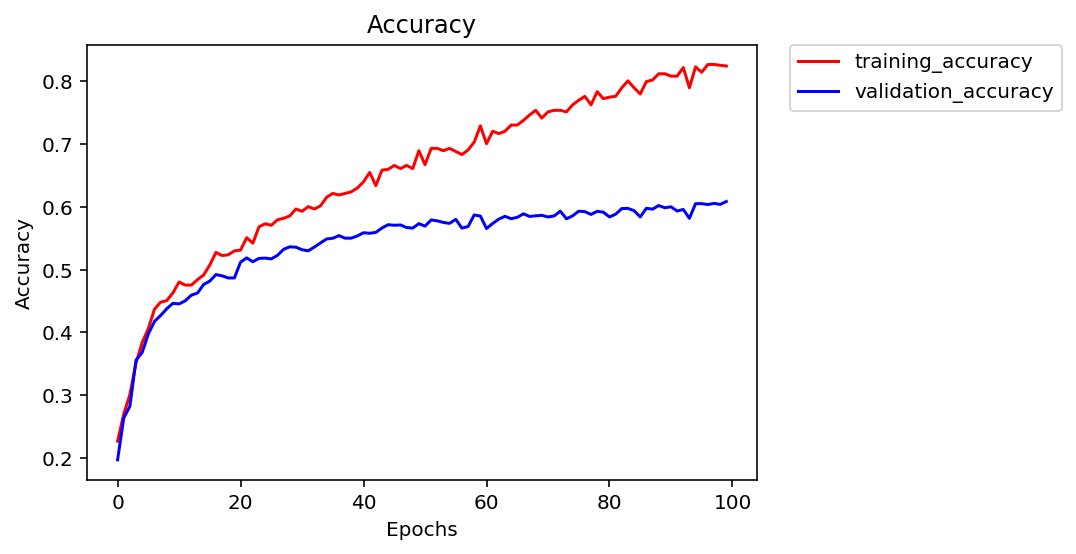

In [16]:
plot_accuracy("Accuracy", acc_data, val_acc_data, epochs)

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
Loss: 2.247932195663452 accuracy: 0.17450495064258575

Validation accuracy: 0.14880000054836273
Epoch  1, CIFAR-10 Batch 2:  
Loss: 2.145843744277954 accuracy: 0.2611386179924011

Validation accuracy: 0.2572000026702881
Epoch  1, CIFAR-10 Batch 3:  
Loss: 1.9652472734451294 accuracy: 0.2970297038555145

Validation accuracy: 0.28700000047683716
Epoch  1, CIFAR-10 Batch 4:  
Loss: 1.883435845375061 accuracy: 0.3378712832927704

Validation accuracy: 0.3192000091075897
Epoch  1, CIFAR-10 Batch 5:  
Loss: 1.8147786855697632 accuracy: 0.35148516297340393

Validation accuracy: 0.3610000014305115
Epoch  2, CIFAR-10 Batch 1:  
Loss: 1.773059368133545 accuracy: 0.38737624883651733

Validation accuracy: 0.3783999979496002
Epoch  2, CIFAR-10 Batch 2:  
Loss: 1.7369855642318726 accuracy: 0.38985148072242737

Validation accuracy: 0.39719998836517334
Epoch  2, CIFAR-10 Batch 3:  
Loss: 1.6317247152328491 accuracy: 0.43440595269203186

Validation accuracy: 0.3

Epoch 14, CIFAR-10 Batch 2:  
Loss: 1.0751194953918457 accuracy: 0.625

Validation accuracy: 0.5834000110626221
Epoch 14, CIFAR-10 Batch 3:  
Loss: 1.0176184177398682 accuracy: 0.6398515105247498

Validation accuracy: 0.5985999703407288
Epoch 14, CIFAR-10 Batch 4:  
Loss: 1.06186044216156 accuracy: 0.6324257254600525

Validation accuracy: 0.598800003528595
Epoch 14, CIFAR-10 Batch 5:  
Loss: 1.0428390502929688 accuracy: 0.6410890817642212

Validation accuracy: 0.600600004196167
Epoch 15, CIFAR-10 Batch 1:  
Loss: 1.0653162002563477 accuracy: 0.625

Validation accuracy: 0.5978000164031982
Epoch 15, CIFAR-10 Batch 2:  
Loss: 1.0464324951171875 accuracy: 0.646039605140686

Validation accuracy: 0.6007999777793884
Epoch 15, CIFAR-10 Batch 3:  
Loss: 1.0151431560516357 accuracy: 0.6336633563041687

Validation accuracy: 0.5950000286102295
Epoch 15, CIFAR-10 Batch 4:  
Loss: 1.0439238548278809 accuracy: 0.6386138796806335

Validation accuracy: 0.6057999730110168
Epoch 15, CIFAR-10 Batch 5:  
L

Epoch 27, CIFAR-10 Batch 3:  
Loss: 0.8242861032485962 accuracy: 0.7215346693992615

Validation accuracy: 0.6444000005722046
Epoch 27, CIFAR-10 Batch 4:  
Loss: 0.8550554513931274 accuracy: 0.7202970385551453

Validation accuracy: 0.6471999883651733
Epoch 27, CIFAR-10 Batch 5:  
Loss: 0.8360706567764282 accuracy: 0.728960394859314

Validation accuracy: 0.6448000073432922
Epoch 28, CIFAR-10 Batch 1:  
Loss: 0.8687334060668945 accuracy: 0.7153465151786804

Validation accuracy: 0.6478000283241272
Epoch 28, CIFAR-10 Batch 2:  
Loss: 0.8432934284210205 accuracy: 0.7165841460227966

Validation accuracy: 0.652999997138977
Epoch 28, CIFAR-10 Batch 3:  
Loss: 0.8162109851837158 accuracy: 0.719059407711029

Validation accuracy: 0.63919997215271
Epoch 28, CIFAR-10 Batch 4:  
Loss: 0.84967041015625 accuracy: 0.7141088843345642

Validation accuracy: 0.6488000154495239
Epoch 28, CIFAR-10 Batch 5:  
Loss: 0.8383243680000305 accuracy: 0.7314356565475464

Validation accuracy: 0.6444000005722046
Epoch 2

Epoch 40, CIFAR-10 Batch 4:  
Loss: 0.7412063479423523 accuracy: 0.7623762488365173

Validation accuracy: 0.6589999794960022
Epoch 40, CIFAR-10 Batch 5:  
Loss: 0.7174606323242188 accuracy: 0.7735148668289185

Validation accuracy: 0.6606000065803528
Epoch 41, CIFAR-10 Batch 1:  
Loss: 0.7426100373268127 accuracy: 0.7512376308441162

Validation accuracy: 0.6665999889373779
Epoch 41, CIFAR-10 Batch 2:  
Loss: 0.7295526266098022 accuracy: 0.7537128925323486

Validation accuracy: 0.6654000282287598
Epoch 41, CIFAR-10 Batch 3:  
Loss: 0.7214812636375427 accuracy: 0.7475247383117676

Validation accuracy: 0.6574000120162964
Epoch 41, CIFAR-10 Batch 4:  
Loss: 0.7442969083786011 accuracy: 0.7586633563041687

Validation accuracy: 0.6600000262260437
Epoch 41, CIFAR-10 Batch 5:  
Loss: 0.7133414149284363 accuracy: 0.7747524976730347

Validation accuracy: 0.6601999998092651
Epoch 42, CIFAR-10 Batch 1:  
Loss: 0.7330732941627502 accuracy: 0.7537128925323486

Validation accuracy: 0.6682000160217285


Epoch 53, CIFAR-10 Batch 5:  
Loss: 0.6122899055480957 accuracy: 0.7982673048973083

Validation accuracy: 0.6797999739646912
Epoch 54, CIFAR-10 Batch 1:  
Loss: 0.6428954005241394 accuracy: 0.7735148668289185

Validation accuracy: 0.6787999868392944
Epoch 54, CIFAR-10 Batch 2:  
Loss: 0.6711251139640808 accuracy: 0.7586633563041687

Validation accuracy: 0.6668000221252441
Epoch 54, CIFAR-10 Batch 3:  
Loss: 0.5991590619087219 accuracy: 0.8069307208061218

Validation accuracy: 0.6848000288009644
Epoch 54, CIFAR-10 Batch 4:  
Loss: 0.667917788028717 accuracy: 0.771039605140686

Validation accuracy: 0.6690000295639038
Epoch 54, CIFAR-10 Batch 5:  
Loss: 0.6087024807929993 accuracy: 0.801980197429657

Validation accuracy: 0.678600013256073
Epoch 55, CIFAR-10 Batch 1:  
Loss: 0.634211003780365 accuracy: 0.7883663177490234

Validation accuracy: 0.6837999820709229
Epoch 55, CIFAR-10 Batch 2:  
Loss: 0.6430205702781677 accuracy: 0.7735148668289185

Validation accuracy: 0.6801999807357788
Epoch

Epoch 67, CIFAR-10 Batch 1:  
Loss: 0.5513426065444946 accuracy: 0.8081682920455933

Validation accuracy: 0.6916000247001648
Epoch 67, CIFAR-10 Batch 2:  
Loss: 0.574895977973938 accuracy: 0.7945544719696045

Validation accuracy: 0.6862000226974487
Epoch 67, CIFAR-10 Batch 3:  
Loss: 0.5274075269699097 accuracy: 0.8205445408821106

Validation accuracy: 0.6886000037193298
Epoch 67, CIFAR-10 Batch 4:  
Loss: 0.5448395013809204 accuracy: 0.823019802570343

Validation accuracy: 0.6908000111579895
Epoch 67, CIFAR-10 Batch 5:  
Loss: 0.5313806533813477 accuracy: 0.8279703259468079

Validation accuracy: 0.6837999820709229
Epoch 68, CIFAR-10 Batch 1:  
Loss: 0.5484341979026794 accuracy: 0.8081682920455933

Validation accuracy: 0.6898000240325928
Epoch 68, CIFAR-10 Batch 2:  
Loss: 0.5646708011627197 accuracy: 0.8032178282737732

Validation accuracy: 0.6833999752998352
Epoch 68, CIFAR-10 Batch 3:  
Loss: 0.5417526364326477 accuracy: 0.8131188154220581

Validation accuracy: 0.6837999820709229
Ep

Epoch 80, CIFAR-10 Batch 2:  
Loss: 0.4986169636249542 accuracy: 0.8353960514068604

Validation accuracy: 0.6905999779701233
Epoch 80, CIFAR-10 Batch 3:  
Loss: 0.4725671410560608 accuracy: 0.844059407711029

Validation accuracy: 0.6904000043869019
Epoch 80, CIFAR-10 Batch 4:  
Loss: 0.5111152529716492 accuracy: 0.8267326951026917

Validation accuracy: 0.6826000213623047
Epoch 80, CIFAR-10 Batch 5:  
Loss: 0.48283299803733826 accuracy: 0.8415841460227966

Validation accuracy: 0.6912000179290771
Epoch 81, CIFAR-10 Batch 1:  
Loss: 0.5073583126068115 accuracy: 0.8452970385551453

Validation accuracy: 0.6880000233650208
Epoch 81, CIFAR-10 Batch 2:  
Loss: 0.5077890157699585 accuracy: 0.8180692791938782

Validation accuracy: 0.6922000050544739
Epoch 81, CIFAR-10 Batch 3:  
Loss: 0.4683327376842499 accuracy: 0.844059407711029

Validation accuracy: 0.6909999847412109
Epoch 81, CIFAR-10 Batch 4:  
Loss: 0.5118169784545898 accuracy: 0.8279703259468079

Validation accuracy: 0.6877999901771545
E

Epoch 93, CIFAR-10 Batch 3:  
Loss: 0.38502153754234314 accuracy: 0.8700494766235352

Validation accuracy: 0.6941999793052673
Epoch 93, CIFAR-10 Batch 4:  
Loss: 0.449262797832489 accuracy: 0.8601484894752502

Validation accuracy: 0.6934000253677368
Epoch 93, CIFAR-10 Batch 5:  
Loss: 0.40479037165641785 accuracy: 0.8626237511634827

Validation accuracy: 0.6901999711990356
Epoch 94, CIFAR-10 Batch 1:  
Loss: 0.4272296130657196 accuracy: 0.8663366436958313

Validation accuracy: 0.6890000104904175
Epoch 94, CIFAR-10 Batch 2:  
Loss: 0.4490644931793213 accuracy: 0.8502475023269653

Validation accuracy: 0.6895999908447266
Epoch 94, CIFAR-10 Batch 3:  
Loss: 0.40217143297195435 accuracy: 0.8564356565475464

Validation accuracy: 0.6881999969482422
Epoch 94, CIFAR-10 Batch 4:  
Loss: 0.43658456206321716 accuracy: 0.8663366436958313

Validation accuracy: 0.6980000138282776
Epoch 94, CIFAR-10 Batch 5:  
Loss: 0.3900461494922638 accuracy: 0.8762376308441162

Validation accuracy: 0.69840002059936

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.692010122537613



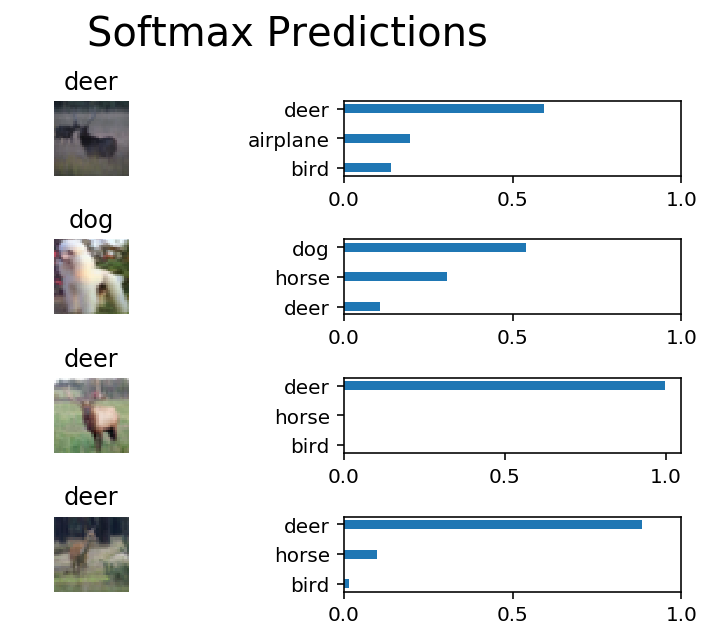

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.